<h1>Natural Language Processing Assignment</h1>
<h2>Part A: Sentiment Analysis</h2>

<h3>Import Required Packages</h3>

In [1]:
import os
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# my classes
from preprocessor import MyPreprocessor
from feature_generator import NormTech
from feature_generator import MyFeatureGenerator
from naive_bayes import MyNaiveBayesClassifier
from helpers import Helpers
helpers = Helpers()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leechilvers/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leechilvers/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leechilvers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>Read in the Review Data</h3>

In [3]:
# Get the positive and negative reviews
def get_reviews_in(path):
    review_file_pattern = re.compile('\d+_\d+.txt')
    files = os.listdir(path)
    # get the review file names
    review_files = [file for file in files if review_file_pattern.match(file)] 
    # get the content of each review file
    reviews = []
    for review_file in review_files:
        review_file_path = os.path.join(path, review_file)
        with open(review_file_path, 'r') as content:
            reviews.append(content.read())

    return reviews

# x data
pos_reviews = get_reviews_in('film_reviews/pos')
neg_reviews = get_reviews_in('film_reviews/neg')
reviews = pos_reviews + neg_reviews

# y data
pos_labels = [0] * len(pos_reviews)
neg_labels = [1] * len(neg_reviews)
labels = pos_labels + neg_labels

<h3>Split the Reviews into Train, Dev and Test Sets</h3>

In [4]:
# split the data into train/dev/test splits
# 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)
# split test into 50% dev and 50% test
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

<h3>Obtaining 3 Feature Sets</h3>

<h4> n-grams </h4>

Deciding between unigram, bigram, trigram (+) by preprocessing the data with lemmatisation, lowercase, stopwords removed and punctuation removed. 

Using standard frequency normalisation.

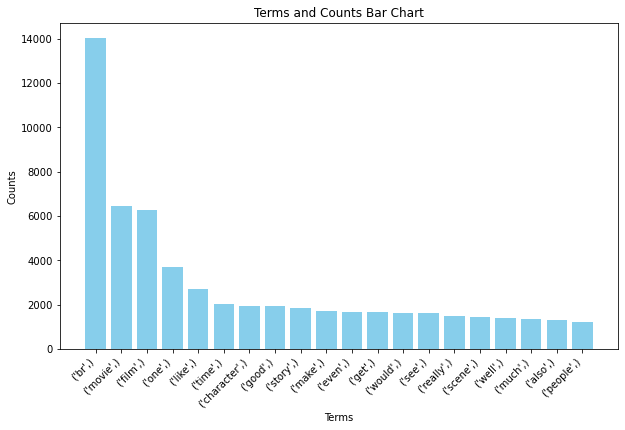

In [5]:
# preprocess data using the methods specified

# unigrams
preprocessor = MyPreprocessor()
train_revs = preprocessor.preprocess(x_train, n_gram_len=1)
dev_revs = preprocessor.preprocess(x_dev, n_gram_len=1)

# generate features with frequency normalisation
feature_generator = MyFeatureGenerator(preprocessor.vocab)
train_set_unigrams = feature_generator.generate_features(train_revs, NormTech.FREQ_NORM)

# present graph of count of most common features
helpers.plot_graph(feature_generator, 20)

# do same with dev set to evaluate
dev_set_unigrams = feature_generator.generate_features(dev_revs, NormTech.FREQ_NORM)

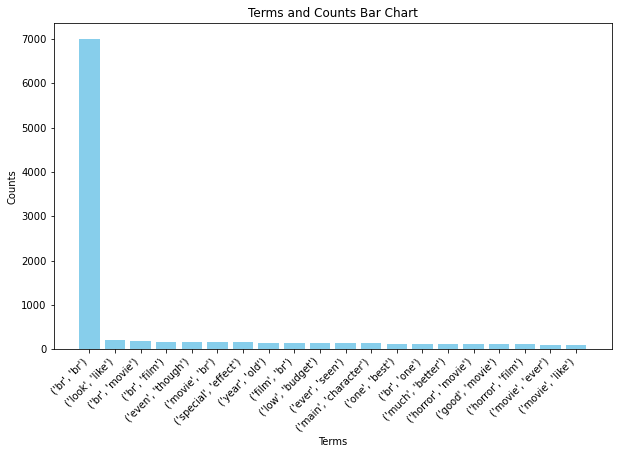

In [7]:
# bigrams
preprocessor = MyPreprocessor()
train_revs = preprocessor.preprocess(x_train, n_gram_len=2)
dev_revs = preprocessor.preprocess(x_dev, n_gram_len=2)

feature_generator = MyFeatureGenerator(preprocessor.vocab)
train_set_bigrams = feature_generator.generate_features(train_revs, NormTech.FREQ_NORM)

helpers.plot_graph(feature_generator, 20)

dev_set_bigrams = feature_generator.generate_features(dev_revs, NormTech.FREQ_NORM)

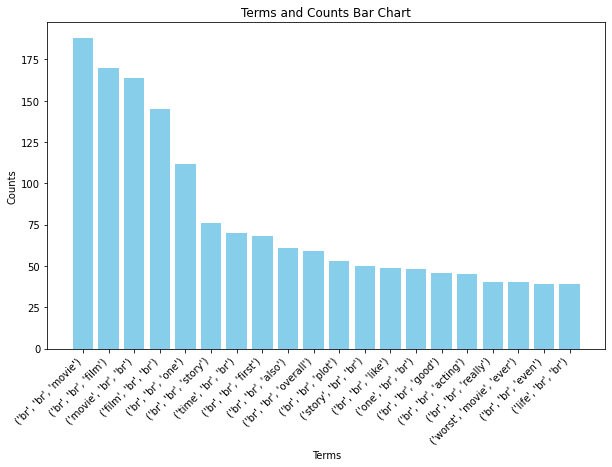

In [8]:
# trigrams
preprocessor = MyPreprocessor()
train_revs = preprocessor.preprocess(x_train, n_gram_len=3)
dev_revs = preprocessor.preprocess(x_dev, n_gram_len=3)

feature_generator = MyFeatureGenerator(preprocessor.vocab)
train_set_trigrams = feature_generator.generate_features(train_revs, NormTech.FREQ_NORM)

helpers.plot_graph(feature_generator, 20)

dev_set_trigrams = feature_generator.generate_features(dev_revs, NormTech.FREQ_NORM)

In [9]:
# 4-gram
preprocessor = MyPreprocessor()
train_revs = preprocessor.preprocess(x_train, n_gram_len=4)
dev_revs = preprocessor.preprocess(x_dev, n_gram_len=4)

feature_generator = MyFeatureGenerator(preprocessor.vocab)
train_set_4grams = feature_generator.generate_features(train_revs, NormTech.FREQ_NORM)

helpers.plot_graph(feature_generator, 20)

dev_set_4grams = feature_generator.generate_features(dev_revs, NormTech.FREQ_NORM)

KeyboardInterrupt: 

Using MyNaiveBayesClassifier, decide what n-gram size gives best accuracy. Use this n moving forward.

In [ ]:
train_sets = [train_set_unigrams, train_set_bigrams, train_set_trigrams, train_set_4grams]
dev_sets = [dev_set_unigrams, dev_set_bigrams, dev_set_trigrams, dev_set_4grams]
accuracies_n_grams = []

my_clf = MyNaiveBayesClassifier()

for i, train_set in enumerate(train_sets):
    my_clf.fit(train_set, y_train)
    predictions = my_clf.predict(dev_sets[i])
    accuracies_n_grams.append(accuracy_score(y_dev, predictions))

%store accuracies_n_grams
print(accuracies_n_grams)

In [8]:
clf = MultinomialNB()
clf.fit(train_set_1, y_train)
predictions = clf.predict(dev_set_1)
accuracy_score(y_dev, predictions)

0.63

Put accuracy into a heat map for all the various models

<h3>SGD Based Classification and SVMs</h3>

In [8]:
# lemmatisation, lowercase, stopwords removed, punctuation NOT removed, unigrams
preprocessor = MyPreprocessor()
train_revs = preprocessor.preprocess(x_train, n_gram_len=1)
dev_revs = preprocessor.preprocess(x_dev, n_gram_len=1)

# one hot embeddings
feature_generator = MyFeatureGenerator(preprocessor.vocab)
train_set_1_ONE_HOT = feature_generator.generate_features(train_revs, NormTech.ONE_HOT)
dev_set_1_ONE_HOT = feature_generator.generate_features(dev_revs, NormTech.ONE_HOT)

In [7]:
clf = SGDClassifier(loss='log', random_state=42)  # 'log' for logistic regression (binary classification)
clf.fit(train_set_1_ONE_HOT, y_train)

predictions = clf.predict(dev_set_1_ONE_HOT)
accuracy_score(y_dev, predictions)


0.525

In [10]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(train_set_1_ONE_HOT, y_train)

predictions = clf.predict(dev_set_1_ONE_HOT)
accuracy_score(y_dev, predictions)

0.835